# Семинар 4. Метрики качества для классификации.

Источник: https://github.com/shestakoff/hse_se_ml/tree/master/2019/s6-quality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', 500)

# Метрики качества для классификации

В этом семинаре мы рассмотрим несколько метрик качества для задачи классификации. Мы сравним несколько классификаторов и выберем лучший из них.

## Данные

Мы будем использовать данные [соревнования по анализу данных](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29). 

Одним из способов повышения эффективности взаимодействия банка с клиентами является рассылка предложений о новой услуге не всем клиентам банка, а только определенной части, выбранной исходя из наибольшей склонности реагировать на это предложение.

Задача состоит в том, чтобы предложить алгоритм, который будет оценивать склонность клиента к положительному ответу по его характерному описанию. Это можно интерпретировать как вероятность положительного ответа. Предполагается, что, получив такие оценки для определенного набора клиентов, банк будет адресовать предложение только тем клиентам, вероятность которых выше определенного порога.

Описание данных (англ.):

* **AGREEMENT_RK**:	unique identifier
* **TARGET**: target feature. Response to the marketing campaign (1 - the response was registered, 0 - there was no response)
* **AGE**: customer age
* **SOCSTATUS_WORK_FL**: social status of the client relative to work (1 - works, 0 - does not work)
* **SOCSTATUS_PENS_FL**: social status of the client relative to the pension (1 - retired, 0 - not retired)
* **GENDER**: gender of the client
* **CHILD_TOTAL**: number of children of the client
* **DEPENDANTS**: number of client dependents
* **EDUCATION**: education
* **MARITAL_STATUS**: marital status 


* **GEN_INDUSTRY**: customer work industry
* **GEN_TITLE**: position
* **ORG_TP_STATE**: ownership of the company
* **ORG_TP_FCAPITAL**: relation to foreign capital
* **JOB_DIR**:	activity inside the company
* **FAMILY_INCOME**:	family income (several categories)
* **PERSONAL_INCOME**:	client's personal income (in rubles)


* **REG_ADDRESS_PROVINCE**:	customer registration area
* **FACT_ADDRESS_PROVINCE**:	client's actual area
* **POSTAL_ADDRESS_PROVINCE**:	postal address of the area
* **TP_PROVINCE**:	area of the outlet where the customer took the last loan
* **REGION_NM**:	region of the Russian Federation
* **REG_FACT_FL**:	the registration address and the address of the actual stay of the client coincide (1 - matches, 0 - does not match)
* **FACT_POST_FL**:	the address of the actual stay of the client and his mailing address are the same (1 is the same, 0 is not the same)
* **REG_POST_FL**:	the registration address of the client and his postal address match (1 - matches, 0 - does not match)
* **REG_FACT_POST_FL**:	postal, actual and registration address match (1 - match, 0 - do not match)
* **REG_FACT_POST_TP_FL**:	the area of registration, the actual stay, postal address and the location of the outlet where the customer took the loan match (1 - match, 0 - do not match)


* **FL_PRESENCE_FL**:	the ownership of the apartment (1 - yes, 0 - no)
* **OWN_AUTO**:	number of cars in the property
* **AUTO_RUS_FL**:	ownership of a Russian-made car (1 - yes, 0 - no)
* **HS_PRESENCE_FL**:	the presence of a country house in the property (1 - yes, 0 - no)
* **COT_PRESENCE_FL**:	the ownership of the cottage (1 - yes, 0 - no)
* **GAR_PRESENCE_FL**:	the presence in the property of the garage (1 - yes, 0 - no)
* **LAND_PRESENCE_FL**:	the ownership of the land (1 - yes, 0 - no)


* **CREDIT**:	amount of the client’s last loan (in rubles)
* **TERM**:	credit term
* **FST_PAYMENT**:	down payment (in rubles)
* **DL_DOCUMENT_FL**:	the client indicated the driver's license in the questionnaire (1 - indicated, 0 - did not indicate)
* **GPF_DOCUMENT_FL**:	In the questionnaire, the client indicated GPF (1 - indicated, 0 - did not indicate)


* **FACT_LIVING_TERM**:	the number of months of residence at the place of actual stay
* **WORK_TIME**:	working time at the current location (in months)
* **FACT_PHONE_FL**: presence in the application of the phone at the actual place of stay
* **REG_PHONE_FL**:	presence in the application of the phone at the place of registration
* **GEN_PHONE_FL**:	presence in the application of a working phone


* **LOAN_NUM_TOTAL**:	amount of customer loans
* **LOAN_NUM_CLOSED**:	amount of customer loan repaid
* **LOAN_NUM_PAYM**:	the number of payments made by the client
* **LOAN_DLQ_NUM**:	number of customer delinquencies
* **LOAN_MAX_DLQ**:	maximum delay number allowed by the client
* **LOAN_AVG_DLQ_AMT**:	average amount of delay (in rubles)
* **LOAN_MAX_DLQ_AMT**:	maximum amount of delay (in rubles)
* **PREVIOUS_CARD_NUM_UTILIZED**:	the number of already recycled cards (if empty - 0)

In [2]:
!wget -O 'data_train_complete.xlsx' -q https://github.com/hse-ds/ml-hse-nes/blob/main/2022/seminars/seminar04/data/data_train_complete.xlsx?raw=true

In [3]:
data = pd.read_excel('data_train_complete.xlsx')

In [4]:
data.head()

,AGE,AGREEMENT_RK,AUTO_RUS_FL,CHILD_TOTAL,COT_PRESENCE_FL,CREDIT,DEPENDANTS,DL_DOCUMENT_FL,EDUCATION,FACT_ADDRESS_PROVINCE,FACT_LIVING_TERM,FACT_PHONE_FL,FACT_POST_FL,FAMILY_INCOME,FL_PRESENCE_FL,FST_PAYMENT,GAR_PRESENCE_FL,GENDER,GEN_INDUSTRY,GEN_PHONE_FL,GEN_TITLE,GPF_DOCUMENT_FL,HS_PRESENCE_FL,JOB_DIR,LAND_PRESENCE_FL,LOAN_AVG_DLQ_AMT,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_MAX_DLQ_AMT,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_NUM_TOTAL,MARITAL_STATUS,ORG_TP_FCAPITAL,ORG_TP_STATE,OWN_AUTO,PERSONAL_INCOME,POSTAL_ADDRESS_PROVINCE,PREVIOUS_CARD_NUM_UTILIZED,REGION_NM,REG_ADDRESS_PROVINCE,REG_FACT_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,REG_PHONE_FL,REG_POST_FL,SOCSTATUS_PENS_FL,SOCSTATUS_WORK_FL,TARGET,TERM,TP_PROVINCE,WORK_TIME
0,32,18669,0,3,0,21650.00,3,0,Среднее,Кабардино-Балкария,137,1,1,от 10000 до 20000 руб.,0,4000.00,0,1,Торговля,1,Рабочий,1,0,Участие в основ. деятельности,0,4020.0,1,1,4020.0,1,6,1,Состою в браке,Без участия,Индивидуальный предприниматель,0,12000.0,Кабардино-Балкария,NaN,ЮЖНЫЙ,Кабардино-Балкария,1,1,0,0,1,0,1,0,6,Ставропольский край,97.0
1,53,21045,0,2,0,32914.31,0,0,Высшее,Ярославская область,228,1,1,свыше 50000 руб.,0,29080.92,0,0,Здравоохранение,1,Руководитель высшего звена,0,0,Участие в основ. деятельности,0,0.0,0,0,0.0,1,3,1,Состою в браке,Без участия,Частная компания,0,100000.0,Ярославская область,NaN,ЦЕНТРАЛЬНЫЙ 2,Ярославская область,1,1,1,0,1,0,1,0,4,Ярославская область,156.0
2,54,27126,0,2,0,5160.00,0,0,Среднее специальное,Карелия,240,1,1,от 20000 до 50000 руб.,1,600.00,0,1,Образование,1,Служащий,0,0,Пр-техн. обесп. и телеком.,0,0.0,0,0,0.0,1,3,1,Не состоял в браке,Без участия,Государственная комп./учреж.,0,19000.0,Карелия,NaN,ЦЕНТРАЛЬНЫЙ 2,Карелия,1,1,1,0,1,0,1,0,3,Карелия,120.0
3,45,26104,0,3,0,5770.00,1,0,Среднее специальное,Карелия,72,1,1,от 10000 до 20000 руб.,0,1020.00,0,1,Государственная служба,1,Рабочий,0,0,Служба безопасности,0,810.0,1,1,810.0,1,8,1,Разведен(а),Без участия,Государственная комп./учреж.,0,12000.0,Карелия,NaN,ЦЕНТРАЛЬНЫЙ 2,Карелия,1,1,1,0,1,0,1,0,9,Карелия,72.0
4,41,22056,0,0,0,79910.00,0,0,Высшее,Хабаровский край,5,1,1,свыше 50000 руб.,1,19990.00,0,1,Торговля,1,Индивидуальный предприниматель,1,0,Участие в основ. деятельности,0,0.0,0,0,0.0,1,4,1,Разведен(а),Без участия,Индивидуальный предприниматель,0,60000.0,Хабаровский край,NaN,ДАЛЬНЕВОСТОЧНЫЙ,Хабаровский край,1,1,1,0,1,0,1,1,5,Хабаровский край,168.0


## Предобработка #1

Теперь мы сделаем простую предварительную обработку данных, а именно:

* Удалим "тяжелые" признаки `['EDUCATION', 'FACT_ADDRESS_PROVINCE', 'FAMILY_INCOME', 'GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR', 'MARITAL_STATUS', 'ORG_TP_FCAPITAL', 'REGION_NM', 'REG_ADDRESS_PROVINCE', 'ORG_TP_STATE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE']`

In [5]:
def preproc(df_input):
    
    drop_cols = ['EDUCATION', 'FACT_ADDRESS_PROVINCE', 'FAMILY_INCOME', 'GEN_INDUSTRY', 
                 'GEN_TITLE', 'JOB_DIR', 'MARITAL_STATUS', 'ORG_TP_FCAPITAL', 'REGION_NM', 
                 'REG_ADDRESS_PROVINCE', 'ORG_TP_STATE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 
                 'AGREEMENT_RK']
    
    # Make a copy of data
    df_temp = df_input.copy()
    
    # Drop the hard columns
    df_temp = df_temp.drop(drop_cols, axis=1)
    
    # Fill NaNs with -999
    #df_temp = df_temp.fillna(-999)
    
    # Fill NaNs with 0.0
    #df_temp.loc[:,'PREVIOUS_CARD_NUM_UTILIZED'] = df_temp.loc[:,'PREVIOUS_CARD_NUM_UTILIZED'].fillna(0.0)
    
    return df_temp

In [6]:
data_preproc = preproc(data)

## Train / Test Split

In [7]:
label_col = data_preproc.columns == 'TARGET'

# Take all columns that are not TARGET
X = data_preproc.loc[:, ~label_col].values

# Take TARGET column
y = data_preproc.loc[:, label_col].values.flatten()

In [8]:
X[:2]

array([[3.200000e+01, 0.000000e+00, 3.000000e+00, 0.000000e+00,
        2.165000e+04, 3.000000e+00, 0.000000e+00, 1.370000e+02,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 4.000000e+03,
        0.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 4.020000e+03, 1.000000e+00,
        1.000000e+00, 4.020000e+03, 1.000000e+00, 6.000000e+00,
        1.000000e+00, 0.000000e+00, 1.200000e+04,          nan,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 1.000000e+00, 6.000000e+00,
        9.700000e+01],
       [5.300000e+01, 0.000000e+00, 2.000000e+00, 0.000000e+00,
        3.291431e+04, 0.000000e+00, 0.000000e+00, 2.280000e+02,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 2.908092e+04,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 3.000000e+00,
        1.000000e

In [9]:
y[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [10]:
from sklearn.model_selection import train_test_split

# Split data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Предобработка #2

Замените пропущенные значения средними значениями признаков. Для этого нам нужно рассчитать средние значения для каждого входного признака, используя выборку **train**.

In [11]:
# Import imputer
from sklearn.impute import SimpleImputer

# Create object of the class and set up its parameters
imp = SimpleImputer(missing_values=np.nan, strategy="mean")

# Calculate mean values for each feature
imp.fit(X_train)

# Replace missing values in train and test samples
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

Масштабируйте входные данные с помощью StandardScaler:
$$
X_{new} = \frac{X - \mu}{\sigma}
$$

In [12]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create object of the class and set up its parameters
ss = StandardScaler()

# Estimate mean and sigma values
ss.fit(X_train)

# Scale train and test samples
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Обучение классификаторов

Мы сравним три классификатора:
* KNN
* Логистическая регрессия
* Древо решений (вы еще его не знаете, но так интереснее)

Мы будем использовать scikit-learn реализацию этих классификаторов. Их описания: [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


[Пример:](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
<center><img src="img/clfs.png" width="800"></center>

In [13]:
# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Create object of the classifier's class
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create object of the classifier's class
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                            min_samples_split=2, min_samples_leaf=10, class_weight=None)

# Fit the classifier
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [15]:
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Create object of the classifier's class
logreg = LogisticRegression(penalty='l2', C=1.0, max_iter=1000, class_weight=None)

# Fit the classifier
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Прогнозы

Сделаем прогноз **метки** классов.

In [16]:
# kNN
y_test_knn = knn.predict(X_test)

# Decision Tree
y_test_dt = dt.predict(X_test)

# Logistic Regression
y_test_logreg = logreg.predict(X_test)

In [17]:
print("Truth  : ", y_test[:10])
print("kNN    : ", y_test_knn[:10])
print("DT     : ", y_test_dt[:10])
print("LogReg : ", y_test_logreg[:10])

Truth  :  [0 0 0 1 0 0 0 0 0 0]
kNN    :  [0 0 0 0 0 0 0 0 0 0]
DT     :  [0 0 0 0 0 0 0 0 0 0]
LogReg :  [0 0 0 0 0 0 0 0 0 0]


Сделаем прогноз **вероятности** положительного ответа клиентов.

In [18]:
# kNN
y_test_proba_knn = knn.predict_proba(X_test)[:, 1] # probability of positive response

# Decision Tree
y_test_proba_dt = dt.predict_proba(X_test)[:, 1]

# Logistic Regression
y_test_proba_logreg = logreg.predict_proba(X_test)[:, 1]

In [19]:
print("Truth  : ", y_test[:10])
print("kNN    : ", y_test_proba_knn[:10])
print("DT     : ", y_test_proba_dt[:10])
print("LogReg : ", y_test_proba_logreg[:10])

Truth  :  [0 0 0 1 0 0 0 0 0 0]
kNN    :  [0.  0.  0.2 0.4 0.  0.  0.2 0.  0.2 0. ]
DT     :  [0.         0.09090909 0.1        0.09090909 0.35714286 0.2
 0.         0.1        0.         0.        ]
LogReg :  [0.06772466 0.07936238 0.04856103 0.16119479 0.07838096 0.08336676
 0.07580624 0.2141414  0.02283653 0.09272127]


## Метрики качества для прогнозов меток

Матрица ошибок:

<center><img src='img/binary_conf.png'></center>

* TP (true positive) - currectly predicted positives
* FP (false positive) - incorrectly predicted negatives (1st order error)
* FN (false negative) - incorrectly predicted positives (2nd order error)
* TN (true negative) - currectly predicted negatives
* Pos (Neg) - total number of positives (negatives)

Quality metrics:

* $ \text{Accuracy} = \frac{TP + TN}{Pos+Neg}$
* $ \text{Error rate} = 1 -\text{accuracy}$
* $ \text{Precision} =\frac{TP}{TP + FP}$ 
* $ \text{Recall} =\frac{TP}{TP + FN} = \frac{TP}{Pos}$
* $ \text{F}_\beta \text{-score} = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def quality_metrics_report(y_true, y_pred):
    
    tp = np.sum( (y_true == 1) * (y_pred == 1) )
    fp = np.sum( (y_true == 0) * (y_pred == 1) )
    fn = np.sum( (y_true == 1) * (y_pred == 0) )
    tn = np.sum( (y_true == 0) * (y_pred == 0) )
    
    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return [tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1]

In [21]:
metrics_report = pd.DataFrame(columns=['TP', 'FP', 'FN', 'TN', 'Accuracy', 'Error rate', 'Precision', 'Recall', 'F1'])

metrics_report.loc['kNN', :] = quality_metrics_report(y_test, y_test_knn)
metrics_report.loc['DT', :] = quality_metrics_report(y_test, y_test_dt)
metrics_report.loc['LogReg', :] = quality_metrics_report(y_test, y_test_logreg)

metrics_report

,TP,FP,FN,TN,Accuracy,Error rate,Precision,Recall,F1
kNN,20,79,511,3911,0.869498,0.130502,0.20202,0.037665,0.063492
DT,33,153,498,3837,0.856005,0.143995,0.177419,0.062147,0.09205
LogReg,4,11,527,3979,0.881,0.119,0.266667,0.007533,0.014652


## Метрики качества на основе вероятностей

### ROC кривая

ROC кривая измеряет насколько хорошо классификатор разделяет два класса.

Пусть $y_{\rm i}$ - истинная метрка и $\hat{y}_{\rm i}$ - прогноз вероятности для $i^{\rm th}$ объекта. 

Число положительных и отрицательных объектов: $\mathcal{I}_{\rm 1} = \{i: y_{\rm i}=1\}$ and $\mathcal{I}_{\rm 0} = \{i: y_{\rm i}=0\}$. 

Для каждого порогового значения вероятности $\tau$ считаем True Positive Rate (TPR) и False Positive Rate (FPR):

\begin{equation}
TPR(\tau) = \frac{1}{I_{\rm 1}} \sum_{i \in \mathcal{I}_{\rm 1}} I[\hat{y}_{\rm i} \ge \tau]
\end{equation}

\begin{equation}
FPR(\tau) = \frac{1}{I_{\rm 0}} \sum_{i \in \mathcal{I}_{\rm 0}} I[\hat{y}_{\rm i} \ge \tau]
\end{equation}

In [22]:
from sklearn.metrics import roc_curve, auc

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_proba_dt)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_test_proba_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)

/var/folders/4m/p204fk2575154kpwftxjqtlh0000gn/T/ipykernel_32987/1406681904.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=1)


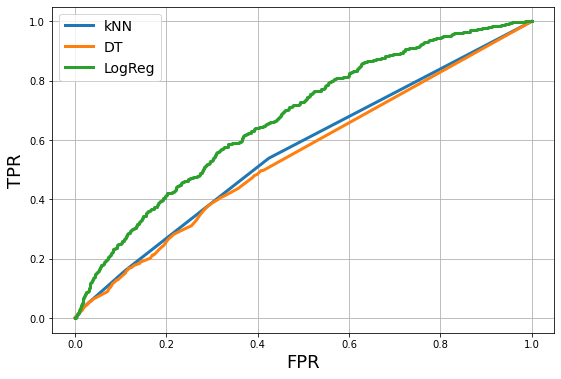

kNN ROC AUC    : 0.5619278894033576
DT ROC AUC     : 0.5478238911780393
LogReg ROC AUC : 0.6743232846711883


In [23]:
plt.figure(figsize=(9, 6))
plt.plot(fpr_knn, tpr_knn, linewidth=3, label='kNN')
plt.plot(fpr_dt, tpr_dt, linewidth=3, label='DT')
plt.plot(fpr_logreg, tpr_logreg, linewidth=3, label='LogReg')

plt.xlabel('FPR', size=18)
plt.ylabel('TPR', size=18)

plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

print('kNN ROC AUC    :', auc_knn)
print('DT ROC AUC     :', auc_dt)
print('LogReg ROC AUC :', auc_logreg)

### Precision-Recall curve

Аналогично ROC кривой.

In [24]:
from sklearn.metrics import precision_recall_curve, auc

precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_test_proba_knn)
#auc_knn = auc(fpr_knn, tpr_knn)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_test_proba_dt)
#auc_dt = auc(fpr_dt, tpr_dt)

precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_test_proba_logreg)
#auc_logreg = auc(fpr_logreg, tpr_logreg)

/var/folders/4m/p204fk2575154kpwftxjqtlh0000gn/T/ipykernel_32987/1530053669.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=1)


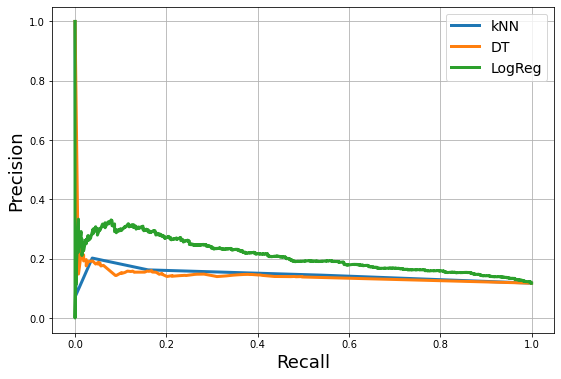

In [25]:
plt.figure(figsize=(9, 6))
plt.plot(recall_knn, precision_knn, linewidth=3, label='kNN')
plt.plot(recall_dt, precision_dt, linewidth=3, label='DT')
plt.plot(recall_logreg, precision_logreg, linewidth=3, label='LogReg')

plt.xlabel('Recall', size=18)
plt.ylabel('Precision', size=18)

plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

**Вопросы**:
* Какой классификатор лучше?
* Как можно улучшить качество моделей?

---

# Дополнительно: метрики качества для регрессии

## Генерируем данные

In [26]:
# Create the dataset
X = np.linspace(0, 6, 200)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + np.random.RandomState(1).normal(0, 0.1, X.shape[0]) + 3

In [27]:
X[:5]

array([[0.        ],
       [0.03015075],
       [0.06030151],
       [0.09045226],
       [0.12060302]])

In [28]:
y[:5]

array([3.16243454, 3.14888995, 3.36141453, 3.49949366, 3.86895208])

/var/folders/4m/p204fk2575154kpwftxjqtlh0000gn/T/ipykernel_32987/1102545768.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=1)


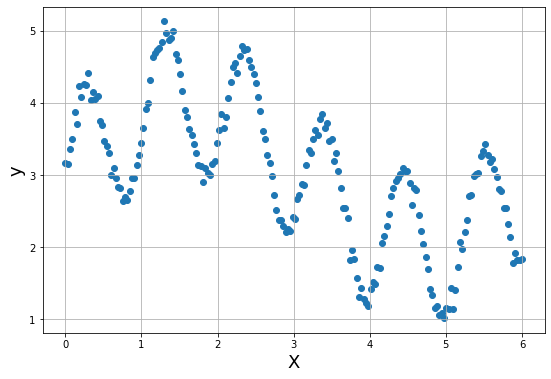

In [29]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], y)

plt.xlabel('X', size=18)
plt.ylabel('y', size=18)
plt.grid(b=1)
plt.show()

## Train / Test Split

In [30]:
from sklearn.model_selection import train_test_split

# Split data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Обучаем регрессоры

Будем использовать три модели:
* kNN
* Древо решений
* Линейная регрессия

Мы будем использовать scikit-learn реализацию этих регрессоров. Их описания: [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html), [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Давайте просто импортируем их и обучим.

In [31]:
# Import kNN regressor
from sklearn.neighbors import KNeighborsRegressor

# Create object of the regressor's class
knn_reg = KNeighborsRegressor(n_neighbors=10)

# Fit the regressor
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [32]:
# Import Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor

# Create object of the regressor's class
dt_reg = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=4, 
                            min_samples_split=2, min_samples_leaf=1)

# Fit the regressor
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [33]:
# Import Linear Regression regressor
from sklearn.linear_model import LinearRegression

# Create object of the regressor's class
linreg = LinearRegression()

# Fit the regressor
linreg.fit(X_train, y_train)

LinearRegression()

## Прогнозы

In [34]:
# kNN
y_test_knn_reg = knn_reg.predict(X_test)

# DT
y_test_dt_reg = dt_reg.predict(X_test)

# LinReg
y_test_linreg = linreg.predict(X_test)

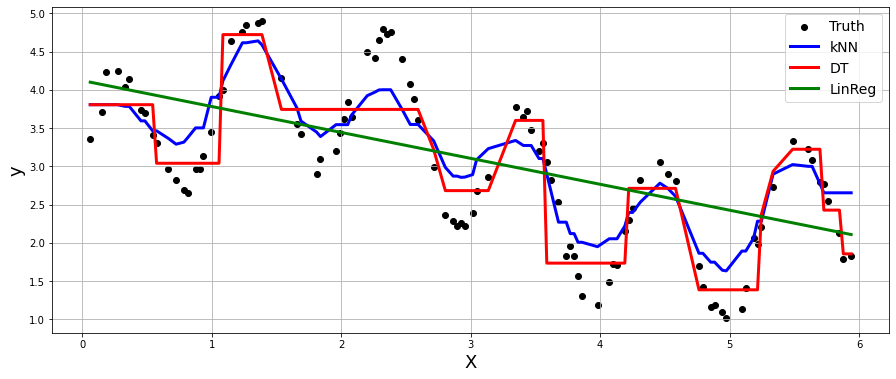

In [35]:
plt.figure(figsize=(15, 6))
plt.scatter(X_test[:, 0], y_test, color='0', label='Truth')

sortd_inds = np.argsort(X_test[:, 0])
plt.plot(X_test[sortd_inds, 0], y_test_knn_reg[sortd_inds], linewidth=3, color='b', label='kNN')
plt.plot(X_test[sortd_inds, 0], y_test_dt_reg[sortd_inds], linewidth=3, color='r', label='DT')
plt.plot(X_test[sortd_inds, 0], y_test_linreg[sortd_inds], linewidth=3, color='g', label='LinReg')

plt.xlabel('X', size=18)
plt.ylabel('y', size=18)
plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show()

**Вопросы**:
* Как вы можете объяснить поведение регрессоров?
* Что будет, если изменить их гиперпараметры?

## Метрики качества

**1. (R)MSE ((Root) Mean Squared Error)**

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_{n=1}^N (y_n - \hat{y}_n)^2$$

**2. MAE (Mean Absolute Error)**

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_{n=1}^N |y_n - \hat{y}_n|$$

**3. RSE (Relative Squared Error)**

$$ L(\hat{y}, y) = \sqrt\frac{\sum\limits_{n=1}^N (y_n - \hat{y}_n)^2}{\sum\limits_{n=1}^N (y_n - \bar{y})^2}$$

**4. RAE (Relative Absolute Error)**

$$ L(\hat{y}, y) = \frac{\sum\limits_{n=1}^N |y_n - \hat{y}_n|}{\sum\limits_{n=1}^N |y_n - \bar{y}|}$$

**5. MAPE (Mean Absolute Persentage Error)**

$$ L(\hat{y}, y) = \frac{100}{N} \sum\limits_{n=1}^N\left|\frac{ y_n - \hat{y}_n}{y_n}\right|$$


**6. RMSLE (Root Mean Squared Logarithmic Error)**

$$ L(\hat{y}, y) = \sqrt{\frac{1}{N}\sum\limits_{n=1}^N(\log(y_n + 1) - \log(\hat{y}_n + 1))^2}$$

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

def regression_quality_metrics_report(y_true, y_pred):
    
    rmse = np.sqrt( mean_squared_error(y_true, y_pred) )
    mae = mean_absolute_error(y_true, y_pred)
    rse = np.sqrt( ( (y_true - y_pred)**2 ).sum() / ( (y_true - y_true.mean())**2 ).sum() )
    rae = np.abs( y_true - y_pred ).sum() / np.abs( y_true - y_true.mean() ).sum()
    mape = 100. / len(y_true) * np.abs( 1. - y_pred/y_true ).sum()
    rmsle = np.sqrt( mean_squared_log_error(y_true, y_pred) )
    
    return [rmse, mae, rse, rae, mape, rmsle]

In [37]:
metrics_report = pd.DataFrame(columns=['RMSE', 'MAE', 'RSE', 'RAE', 'MAPE', 'RMSLE'])

metrics_report.loc['kNN', :] = regression_quality_metrics_report(y_test, y_test_knn_reg)
metrics_report.loc['DT', :] = regression_quality_metrics_report(y_test, y_test_dt_reg)
metrics_report.loc['LinReg', :] = regression_quality_metrics_report(y_test, y_test_linreg)

metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
kNN,0.420838,0.356771,0.409057,0.422188,15.288689,0.121102
DT,0.42662,0.326301,0.414677,0.386131,11.914812,0.112371
LinReg,0.80769,0.685106,0.785079,0.810726,29.634749,0.223014


**Вопросы**:
* Какой регрессор лучше?
* Как вы можете улучшить качество моделей?